In [5]:
import numpy as np
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.endpoints import playercareerstats

# matplotlibD_
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [18]:
def get_player_shotchartdetail(player_name, season_id):
    
    nba_players = players.get_players()
    player_dict = [player for player in nba_players if player['full_name'] == player_name][0]
    print(player_dict)
    
    career = playercareerstats.PlayerCareerStats(player_id=player_dict[
        'id'])
    career_df = career.get_data_frames()[0]
    
    team_id = career_df[career_df['SEASON_ID'] == season_id]['TEAM_ID']
    print(team_id)
    
    shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),
                                                season_type_all_star='Regular Season', 
                                                season_nullable=season_id,
                                                context_measure_simple="FGA").get_data_frames()
    
    return shotchartlist[0], shotchartlist[1]

In [19]:
def draw_court(ax=None, color="black", lw=1, outer_lines=False):
    if ax is None:
        ax = plt.gca()
        
    hoop = Circle((0,0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    backboard = Rectangle((-30, -12.51), 60, 0, linewidth=lw, color=color, fill=False)
    
    outer_box = Rectangle((-80,-47.5), 160, 190, linewidth=lw, color=color, fill=False)
    
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    
    bottom_free_throw = Arc((0,142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
        
    restricted = Arc((0,0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0,0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, restricted, corner_three_a, corner_three_b, three_arc]

    outer_lines = True
    if outer_lines:
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
    
    for element in court_elements:
        ax.add_patch(element)

In [20]:
def shot_chart(data, title="", color="black", xlim=(-250,250), ylim=(422.5, -47.5), line_color="black",
               court_color="black", court_lw=2, outer_lines=False,
               flip_court=False, gridsize=None,
               ax=None, despine=False):
    if ax is None:
        ax = plt.gca()
        
    if not flip_court:
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
    else:
        ax.set_xlim(xlim[::-1])
        ax.set_ylim(ylim[::-1])
    
    ax.tick_params(labelbottom="off", labelleft="off")
    ax.set_title(title, fontsize=10)
    
    draw_court(ax, color=line_color, lw=court_lw, outer_lines=outer_lines)
    
    x_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_X']
    y_missed = data[data['EVENT_TYPE'] == 'Missed Shot']['LOC_Y']
    
    x_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_X']
    y_made = data[data['EVENT_TYPE'] == 'Made Shot']['LOC_Y']
    
    ax.scatter(x_missed, y_missed, facecolors='red', edgecolors='red', marker="x", s=100, linewidths=3)
    
    ax.scatter(x_made, y_made, facecolors='green', edgecolors='white', marker='x', s=100, linewidths=3)
    
    
    for spine in ax.spines:
        ax.spines[spine].set_lw(court_lw)
        ax.spines[spine].set_color(line_color)
        
    if despine:
        ax.spines["top"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)


{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
14    1610612741
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),
/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/4075649198.py:26: UserWarning: You passed a edgecolor/edgecolors ('red') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_missed, y_missed, facecolors='red', edgecolors='red', marker="x", s=100, linewidths=3)
/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/4075649198.py:28: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x_made, 

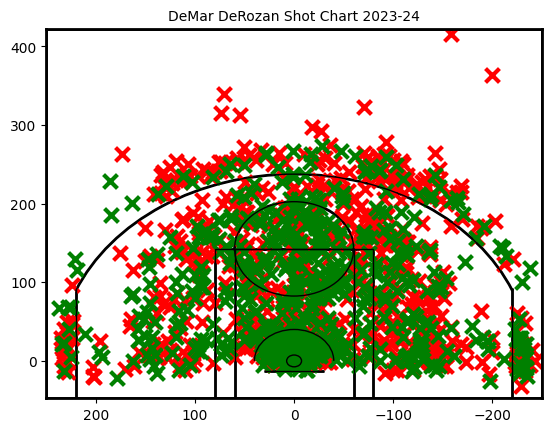

In [25]:
if __name__ == "__main__":
    player_shotchart_df, league_avg = get_player_shotchartdetail("DeMar DeRozan", "2023-24")
    
    shot_chart(player_shotchart_df, title="DeMar DeRozan Shot Chart 2023-24")
    xlim = (-250, 250)
    ylim = (422.5, -47.5)
    
    ax = plt.gca()
    ax.set_xlim(xlim[::-1])
    ax.set_ylim(ylim[::-1])
    draw_court(ax)
    plt.show()

In [30]:
from nba_api.stats.endpoints import shotchartdetail

#player_id = 201939  # Stephen Curry's player ID
#season = '2023-24'
shots_df, league_avg = get_player_shotchartdetail("Stephen Curry", "2023-24")

{'id': 201939, 'full_name': 'Stephen Curry', 'first_name': 'Stephen', 'last_name': 'Curry', 'is_active': True}
14    1610612744
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


In [31]:
def map_shot_zone(shot_zone):
    zone_mapping = {
        'Right Side Center(RC)': 1,
        'Center(C)': 2,
        'Right Side(R)': 3,
        'Left Side(L)': 4,
        'Left Side Center(LC)': 5
    }
    return zone_mapping.get(shot_zone, 0)  # Default to 0 if the zone is not found

In [32]:
shots_df['shot_zone'] = shots_df['SHOT_ZONE_AREA'].apply(map_shot_zone)

In [33]:
shots_df['shot_made_flag'] = shots_df['SHOT_MADE_FLAG']
shots_df['shot_distance'] = shots_df['SHOT_DISTANCE']
shots_df['game_time'] = shots_df['MINUTES_REMAINING'] * 60 + shots_df['SECONDS_REMAINING']

# Drop rows with missing values
shots_df.dropna(subset=['shot_made_flag', 'shot_zone', 'shot_distance', 'game_time'], inplace=True)

In [34]:
shots_df.head(3)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,shot_zone,shot_made_flag,shot_distance,game_time
0,Shot Chart Detail,0022300005,40,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,17,...,153,1,0,20231103,OKC,GSW,5,0,24,497
1,Shot Chart Detail,0022300005,53,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,0,...,243,1,1,20231103,OKC,GSW,1,1,28,420
2,Shot Chart Detail,0022300005,249,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,15,...,272,1,1,20231103,OKC,GSW,2,1,27,375


In [35]:
shots_df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'shot_zone', 'shot_made_flag', 'shot_distance',
       'game_time'],
      dtype='object')

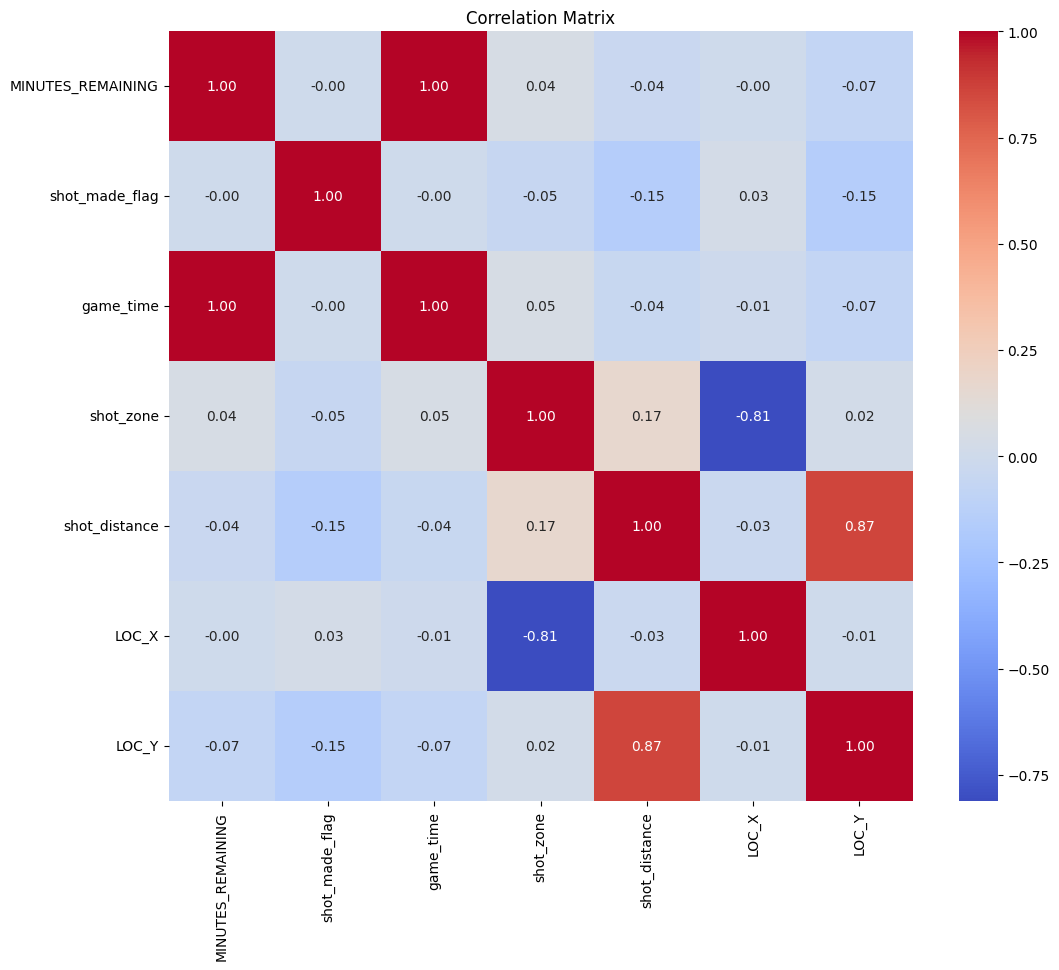

shot_made_flag       1.000000
LOC_X                0.028795
game_time           -0.002372
MINUTES_REMAINING   -0.004618
shot_zone           -0.048110
shot_distance       -0.148045
LOC_Y               -0.148966
Name: shot_made_flag, dtype: float64


In [36]:
#FEATURE ENGINEERING--WHICH FEATURES ARE GOOD FOR THE ANALYSIS
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_df = corr_df = shots_df[['MINUTES_REMAINING', 'shot_made_flag', 'game_time', 'shot_zone', 'shot_distance', 'LOC_X', 'LOC_Y']]
corr = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with the target variable
print(corr['shot_made_flag'].sort_values(ascending=False))

The correlated variables in this graph are shot_distance and loc_y. The distance from where a player shoots is very important as it can indicate the likelihood of a made shot. The correlation could vary from player to player as well, for this particular player it seems like where he is vertically on the court matters more than where he is horizontally. In other use cases, the correlation metrics can result in an outcome where there can be more of correlation for the X_loc indicating a player prefers a particular side of the court more than the other, therefore leading to potential offensive and defensive schemes(ie: forcing the player right or left)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
X = shots_df[['shot_distance', 'shot_zone', 'game_time']]
y = shots_df['shot_made_flag']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.59


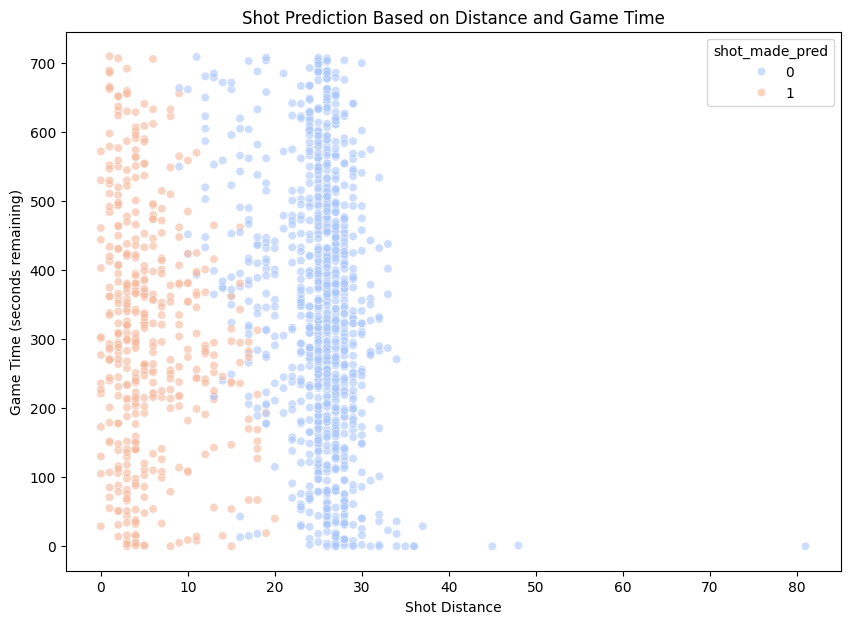

In [38]:
shots_df['shot_made_pred'] = model.predict(X)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='shot_distance', y='game_time', hue='shot_made_pred', data=shots_df, palette='coolwarm', alpha=0.6)
plt.title('Shot Prediction Based on Distance and Game Time')
plt.xlabel('Shot Distance')
plt.ylabel('Game Time (seconds remaining)')
plt.show()

Since most correlations here are weak, it suggests that these features individually have little linear predictive power for shot_made_flag.

Lot of them seem to have almost no significant effect on the predictive capabalities of the model.
The data is also not linear so a regression model may not be a proper fit here.

Let's switch to a gradient boosting classifier.

Why Gradient Boosting Classifier?
Can capture non-linear relationships really well and robust to any data discrepancies.

Additionally, the features do not need to really be correlated as much for the models predictive power.

I will train the model first, see the accuracy and the results of it and then see if feature importance and validation is further necessary.m


In [39]:
# time series
# spacing model with other players
# reasons for model improvisation and simple EDA

In [40]:
import numpy as np

shots_df['SHOT_DISTANCE_FROM_BASKET'] = np.sqrt(shots_df['LOC_X']**2 + shots_df['LOC_Y']**2)
shots_df['SHOT_ANGLE'] = np.arctan2(shots_df['LOC_Y'], shots_df['LOC_X'])
shots_df['TIME_REMAINING'] = shots_df['MINUTES_REMAINING'] * 60 + shots_df['SECONDS_REMAINING']


shots_df['SHOT_ANGLE'] = shots_df['SHOT_ANGLE'].apply(lambda x: x if x >= 0 else x + 2 * np.pi)


Gradient Boosting Model Accuracy: 0.61
ROC-AUC: 0.61
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       257
           1       0.52      0.44      0.48       177

    accuracy                           0.61       434
   macro avg       0.59      0.58      0.58       434
weighted avg       0.60      0.61      0.60       434



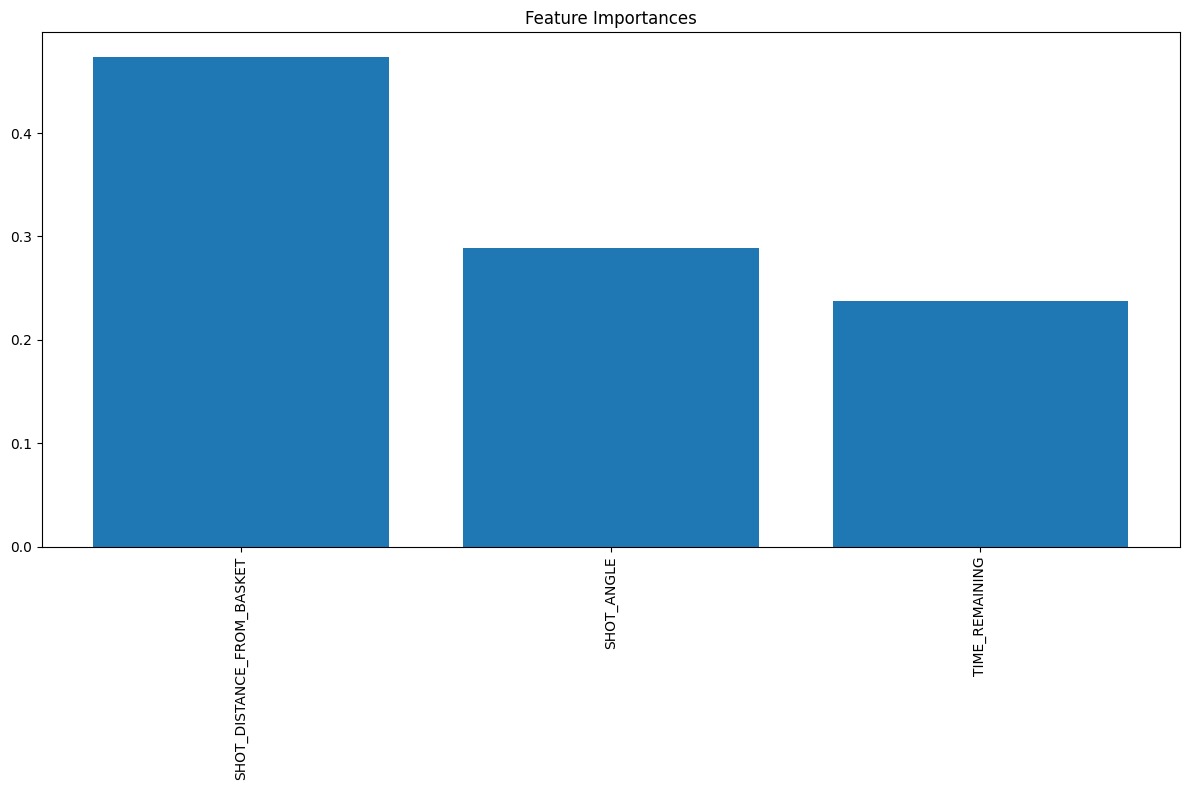

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

features = ['SHOT_DISTANCE_FROM_BASKET', 'SHOT_ANGLE', 'TIME_REMAINING'] 
target = 'SHOT_MADE_FLAG'

X = shots_df[features]
y = shots_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Gradient Boosting Model Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print(classification_report(y_test, y_pred))


importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Define the parameter grid for Gradient Boosting
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'learning_rate': [0.01, 0.1, 0.05, 0.2],
    'max_depth': sp_randint(3, 10),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 20),
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42), param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {random_search.best_params_}')
best_gb = random_search.best_estimator_

# Evaluate the tuned model
y_pred = best_gb.predict(X_test)
y_prob = best_gb.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Tuned Gradient Boosting Model Accuracy: {accuracy:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 19, 'min_samples_split': 12, 'n_estimators': 200, 'subsample': 1.0}
Tuned Gradient Boosting Model Accuracy: 0.63
ROC-AUC: 0.59
              precision    recall  f1-score   support

           0       0.64      0.82      0.72       257
           1       0.57      0.34      0.43       177

    accuracy                           0.63       434
   macro avg       0.61      0.58      0.57       434
weighted avg       0.61      0.63      0.60       434



Future expansions that Sunay will do in 2-3 weeks:

- Model improvements and try to provide context behind the disparity between a player
- More visualizations to make the data more palpable and easier to read
- Who would this data be useful to? Players would probably not care about this data, I think coaches would be more receptive to the data as it helps them figure out lineups within data
- 3D Data or access to data to see how a player moves over time

In [203]:
seasons = ['2019-20', '2020-21', '2021-22']
player_name = "DeMar DeRozan"

data_frames = []
for season in seasons:
    shotchart_df, _ = get_player_shotchartdetail(player_name, season)
    shotchart_df['SEASON_ID'] = season
    data_frames.append(shotchart_df)

# Combine data from all seasons
combined_df = pd.concat(data_frames)

{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
10    1610612759
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_27546/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
11    1610612759
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_27546/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
12    1610612741
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_27546/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


In [204]:
combined_df['GAME_DATE'] = pd.to_datetime(combined_df['GAME_DATE'])

# Sort by GAME_DATE
combined_df = combined_df.sort_values(by='GAME_DATE')

# Aggregate by game date
agg_df = combined_df.groupby('GAME_DATE').agg({
    'SHOT_MADE_FLAG': ['sum', 'count'],
    'SHOT_DISTANCE': 'mean'
}).reset_index()

agg_df.columns = ['GAME_DATE', 'SHOTS_MADE', 'SHOTS_ATTEMPTED', 'AVG_SHOT_DISTANCE']

# Calculate shooting percentage
agg_df['SHOOTING_PERCENTAGE'] = agg_df['SHOTS_MADE'] / agg_df['SHOTS_ATTEMPTED']

# Create rolling features
agg_df['ROLLING_AVG_SHOOTING_PERCENTAGE'] = agg_df['SHOOTING_PERCENTAGE'].rolling(window=5).mean()
agg_df['ROLLING_AVG_SHOT_DISTANCE'] = agg_df['AVG_SHOT_DISTANCE'].rolling(window=5).mean()

/Users/sunaysanghani/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sunaysanghani/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sunaysanghani/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/sunaysanghani/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will 

            Forecast
2022-04-09  0.520732
2022-04-10  0.531231
2022-04-11  0.517266
2022-04-12  0.522053
2022-04-13  0.517512
2022-04-14  0.507472
2022-04-15  0.501845
2022-04-16  0.509894
2022-04-17  0.509735
2022-04-18  0.509980
2022-04-19  0.514955
2022-04-20  0.518463
2022-04-21  0.514064
2022-04-22  0.512849
2022-04-23  0.513609
2022-04-24  0.511553
2022-04-25  0.509316
2022-04-26  0.511533
2022-04-27  0.512888
2022-04-28  0.512188
2022-04-29  0.512798
2022-04-30  0.514168
2022-05-01  0.513181
2022-05-02  0.512096
2022-05-03  0.512514
2022-05-04  0.512511
2022-05-05  0.511730
2022-05-06  0.512082
2022-05-07  0.512827
2022-05-08  0.512648
201    0.520732
202    0.531231
203    0.517266
204    0.522053
205    0.517512
206    0.507472
207    0.501845
208    0.509894
209    0.509735
210    0.509980
211    0.514955
212    0.518463
213    0.514064
214    0.512849
215    0.513609
216    0.511553
217    0.509316
218    0.511533
219    0.512888
220    0.512188
221    0.512798
222    0.5141

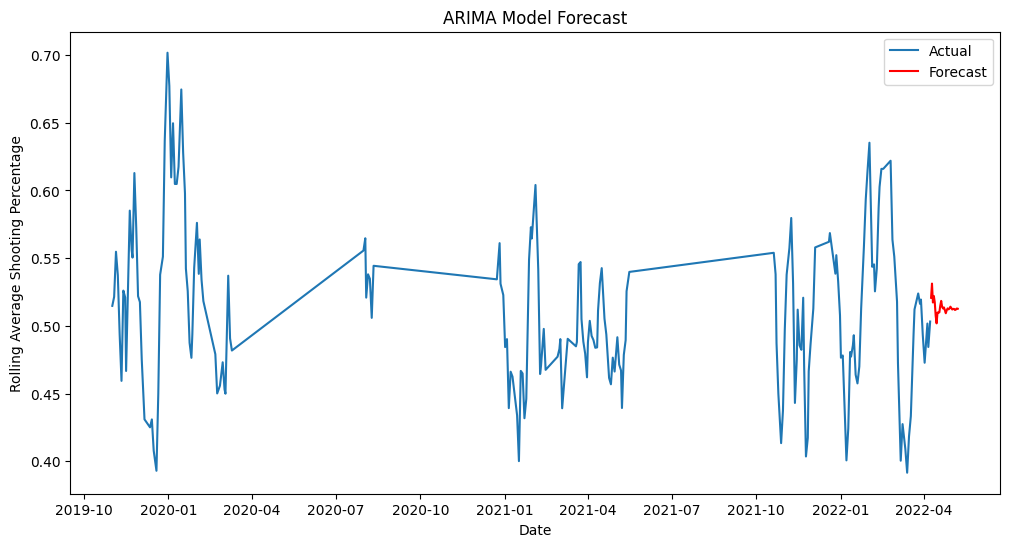

In [250]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data
ts_data = agg_df.set_index('GAME_DATE')['ROLLING_AVG_SHOOTING_PERCENTAGE'].dropna()

# Fit the ARIMA model
arima_model = ARIMA(ts_data, order=(8, 1, 0))
arima_result = arima_model.fit()

# Forecast the future values
forecast_steps = 30
forecast = arima_result.get_forecast(steps=forecast_steps)
for_mean = forecast.predicted_mean
forecast_index = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_df = pd.DataFrame(data=[val for val in for_mean], index=forecast_index, columns=['Forecast'])
print(forecast_df)
print(forecast.predicted_mean)


# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Rolling Average Shooting Percentage')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
12    1610612741
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
13    1610612741
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


{'id': 201942, 'full_name': 'DeMar DeRozan', 'first_name': 'DeMar', 'last_name': 'DeRozan', 'is_active': True}
14    1610612741
Name: TEAM_ID, dtype: int64


/var/folders/jz/tjq4kww13xgcbgf1jbg9w7_00000gn/T/ipykernel_39102/1408936056.py:14: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  shotchartlist = shotchartdetail.ShotChartDetail(team_id=int(team_id),player_id=int(player_dict['id']),


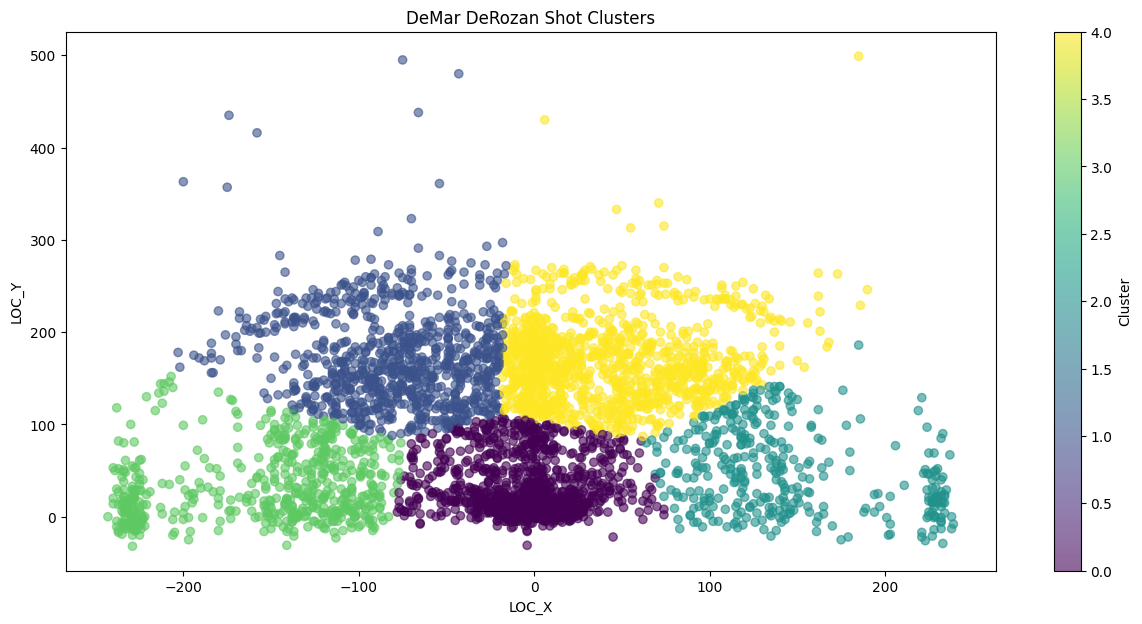

In [16]:
from sklearn.cluster import KMeans
seasons = ['2021-22', '2022-23', '2023-24']
player_name = "DeMar DeRozan"
data_frames = []
for season in seasons:
    shotchart_df, _ = get_player_shotchartdetail(player_name, season)
    shotchart_df['SEASON_ID'] = season
    data_frames.append(shotchart_df)
combined_df = pd.concat(data_frames)

kmeans = KMeans(n_clusters=5, random_state=42) 
X = combined_df[['LOC_X', 'LOC_Y']]

combined_df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(15, 7))
plt.scatter(combined_df['LOC_X'], combined_df['LOC_Y'], c=combined_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title(f'{player_name} Shot Clusters')
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')
plt.colorbar(label='Cluster')
plt.show()